<a href="https://colab.research.google.com/github/MukeshRanaDS/Deep-Learning-Computer-Vision-/blob/main/Building_Convolutional_Neural_Networks_with_TensorFlow_%5BMalaria_Diagnosis%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries Import

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

## Load Dataset

In [2]:
dataset, dataset_info = tfds.load('malaria', with_info=True,
                                  as_supervised=True,
                                  shuffle_files=True,
                                  split=['train'])

## Data Inspection

In [3]:
#
for data in dataset[0].take(1):
  print(data)
  break

(<tf.Tensor: shape=(151, 115, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, <tf.Tensor: shape=(), dtype=int64, numpy=1>)


## Train Test Val Dataset Split

In [4]:
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2

dataset = tf.data.Dataset.range(10)
print(list(dataset.as_numpy_iterator()))

dataset_size = len(dataset)

train_dataset = dataset.take(int(train_ratio * dataset_size))
print(list(train_dataset.as_numpy_iterator()))

val_test_dataset = dataset.skip(int(train_ratio * dataset_size))
val_dataset = val_test_dataset.take(int(val_ratio * dataset_size))
print(list(val_dataset.as_numpy_iterator()))

test_dataset = val_test_dataset.skip(int(val_ratio * dataset_size))
print(list(test_dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5]
[6, 7]
[8, 9]


In [5]:
# Defining the Function to split the data into train-val-test set
def split(dataset, train_ratio, val_ratio, test_ratio):
  dataset_size = len(dataset)

  train_dataset = dataset.take(int(train_ratio * dataset_size))

  val_test_dataset = dataset.skip(int(train_ratio * dataset_size))
  val_dataset = val_test_dataset.take(int(val_ratio * dataset_size))

  test_dataset = val_test_dataset.skip(int(val_ratio * dataset_size))

  return train_dataset, val_dataset, test_dataset


# Calling the Function
train_ratio = 0.6
val_ratio = 0.2
test_ratio = 0.2
dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = split(dataset, train_ratio, val_ratio, test_ratio)


# Print Output
list(train_dataset.as_numpy_iterator()), list(val_dataset.as_numpy_iterator()), list(test_dataset.as_numpy_iterator())

([0, 1, 2, 3, 4, 5], [6, 7], [8, 9])

### Spliting Malaria Dataset

In [6]:
dataset, dataset_info = tfds.load('malaria', with_info=True,
                                  as_supervised=True,
                                  shuffle_files=True,
                                  split=['train'])

In [7]:
# Calling the Function
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

train_dataset, val_dataset, test_dataset = split(dataset[0], train_ratio, val_ratio, test_ratio)

# Print Output
list(train_dataset.take(1).as_numpy_iterator()), list(val_dataset.take(1).as_numpy_iterator()), list(test_dataset.take(1).as_numpy_iterator())

([(array([[[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
   
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
   
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
   
          ...,
   
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
   
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]],
   
          [[0, 0, 0],
           [0, 0, 0],
           [0, 0, 0],
           ...,
           [0, 0, 0],
           [0, 0, 0],
           [0, 0, 0]]], dtype=uint8),
   1)],
 [(array([[[0, 0, 0],
           [0, 0, 0],


## Dataset Visualisation

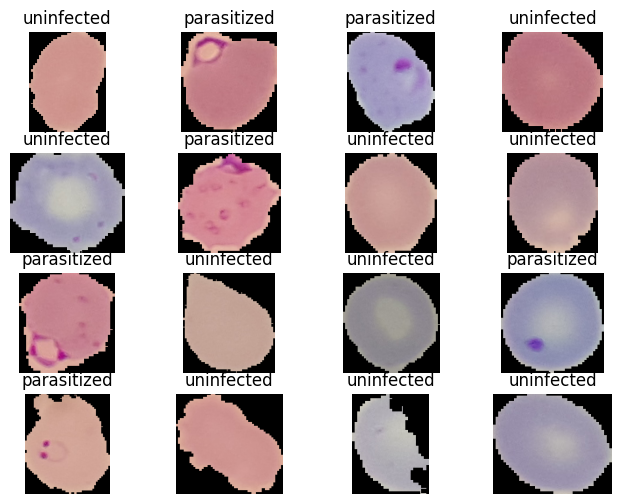

In [8]:
plt.figure(figsize=(8,6))

for i, (image, label) in enumerate(train_dataset.take(16)):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

In [9]:
dataset_info.features['label'].int2str(1)

'uninfected'

## Data Preprocessing

In [10]:
# Convertin the image size of 102x102 to a fixed size of 224x224
# Defining funcction to do so
im_size = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (im_size, im_size))/255.0, label

In [11]:
# Applying the conversion to all train dataset
train_dataset = train_dataset.map(resize_rescale)
val_dataset = val_dataset.map(resize_rescale)
test_dataset = test_dataset.map(resize_rescale)

train_dataset, val_dataset, test_dataset

(<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>)

In [12]:
# Varify the conversion
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32) tf.Tensor(1, shape=(), dtype=int64)


In [13]:
# Suffeling the training dataset
batch_size = 32
train_dataset = train_dataset.shuffle(buffer_size=8,
                                      reshuffle_each_iteration=True,
                                      ).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.shuffle(buffer_size=8,
                                      reshuffle_each_iteration=True,
                                      ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

## Model

In [14]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape=(im_size, im_size, 3)),
    Conv2D(filters=6, kernel_size=5, strides=1, padding='valid', activation='sigmoid'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Conv2D(filters=16, kernel_size=5, strides=1, padding='valid', activation='sigmoid'),
    BatchNormalization(),
    MaxPool2D(pool_size=2, strides=2),

    Flatten(),

    Dense(100, activation='sigmoid'),
    BatchNormalization(),
    Dense(10, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 batch_normalization (Batch  (None, 220, 220, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 batch_normalization_1 (Bat  (None, 106, 106, 16)      64        
 chNormalization)                                                
                                                        

## Binary Crossentropy

In [15]:
# The difference between True and Pred = bce
y_true = [0, ]
y_pred = [0.001, ]

bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
bce(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=0.69364727>

In [16]:
# Model Compiler
lenet_model.compile(optimizer=Adam(learning_rate=0.1),
              loss = BinaryCrossentropy(),
              metrics='accuracy'
              )

In [17]:
history = lenet_model.fit(train_dataset, validation_data = val_dataset, epochs=1, verbose=1)

Epoch 1/5
689/689 [==============================] - 1195s 2s/step - loss: 0.6988 - accuracy: 0.5073 - val_loss: 0.7292 - val_accuracy: 0.5633
Epoch 2/5
689/689 [==============================] - 1185s 2s/step - loss: 0.6985 - accuracy: 0.5056 - val_loss: 0.6914 - val_accuracy: 0.5183
Epoch 3/5
689/689 [==============================] - 1156s 2s/step - loss: 0.6980 - accuracy: 0.5016 - val_loss: 0.7266 - val_accuracy: 0.5125
Epoch 4/5
689/689 [==============================] - 1176s 2s/step - loss: 0.6990 - accuracy: 0.5011 - val_loss: 0.7163 - val_accuracy: 0.4955
Epoch 5/5
689/689 [==============================] - 1174s 2s/step - loss: 0.6986 - accuracy: 0.5032 - val_loss: 0.7169 - val_accuracy: 0.4947
